<a href="https://colab.research.google.com/github/edwardgalligan3/DemoProject/blob/main/A_furniture_similarity_sbert_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛋️ Furniture Product Similarity using SBERT (Expanded Dataset)
This notebook uses Sentence-BERT (SBERT) to compute and visualize similarity among 50 furniture products.

In [ ]:
# Install required packages
!pip install -q sentence-transformers matplotlib seaborn scikit-learn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.0 MB/s eta 0:00:00


In [ ]:
# Import libraries
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np

## 🔽 Upload the expanded furniture CSV file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving furniture_products_50.csv to furniture_products_50.csv


In [ ]:
# Load the expanded dataset
df = pd.read_csv('furniture_products_50.csv')
df.head()

,ProductID,ProductName,Category,Description
0,64,Foldable Picnic Bench,Outdoor,Weather-resistant furniture ideal for patios a...
1,60,Outdoor Lounge Chair,Outdoor,Weather-resistant furniture ideal for patios a...
2,46,Executive Office Desk,Desk,Functional desk with ergonomic features for pr...
3,27,Ergonomic Office Chair,Chair,Supportive and elegant chair ideal for homes o...
4,58,Patio Dining Set,Outdoor,Weather-resistant furniture ideal for patios a...


In [ ]:
# Generate SBERT embeddings for descriptions
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['Description'].tolist(), convert_to_tensor=True)
similarity_matrix = util.cos_sim(embeddings, embeddings).cpu().numpy()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## 🔍 Search for Top-N Similar Products

In [ ]:
def search_similar_products(query_index, top_n=5):
    scores = list(enumerate(similarity_matrix[query_index]))
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    print(f"\nTop {top_n} similar products to: {df['ProductName'][query_index]}")
    for idx, score in sorted_scores:
        print(f"- {df['ProductName'][idx]} (score: {score:.2f})")

# Example usage: search similar to product index 0
search_similar_products(0, top_n=5)


Top 5 similar products to: Foldable Picnic Bench
- Outdoor Lounge Chair (score: 1.00)
- Patio Dining Set (score: 1.00)
- Outdoor Lounge Chair (score: 1.00)
- Weatherproof Garden Table (score: 1.00)
- Modern Leather Recliner Sofa (score: 0.43)


## 📊 t-SNE Visualization of Furniture Embeddings

In [ ]:
# Dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings.cpu().numpy())
df['x'] = reduced_embeddings[:, 0]
df['y'] = reduced_embeddings[:, 1]

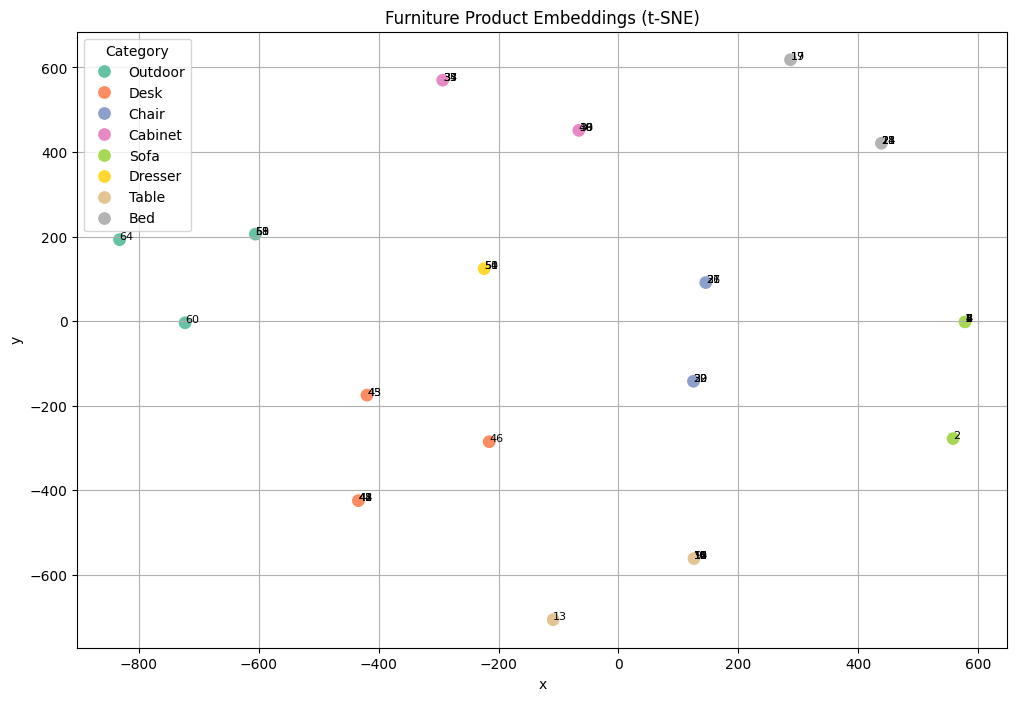

In [ ]:
# Scatterplot with category coloring
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='x', y='y', hue='Category', palette='Set2', s=100)
for i in range(df.shape[0]):
    plt.text(df.x[i]+0.1, df.y[i]+0.1, df.ProductID[i], fontsize=8)
plt.title('Furniture Product Embeddings (t-SNE)')
plt.grid(True)
plt.show()

## 🔥 Cosine Similarity Heatmap

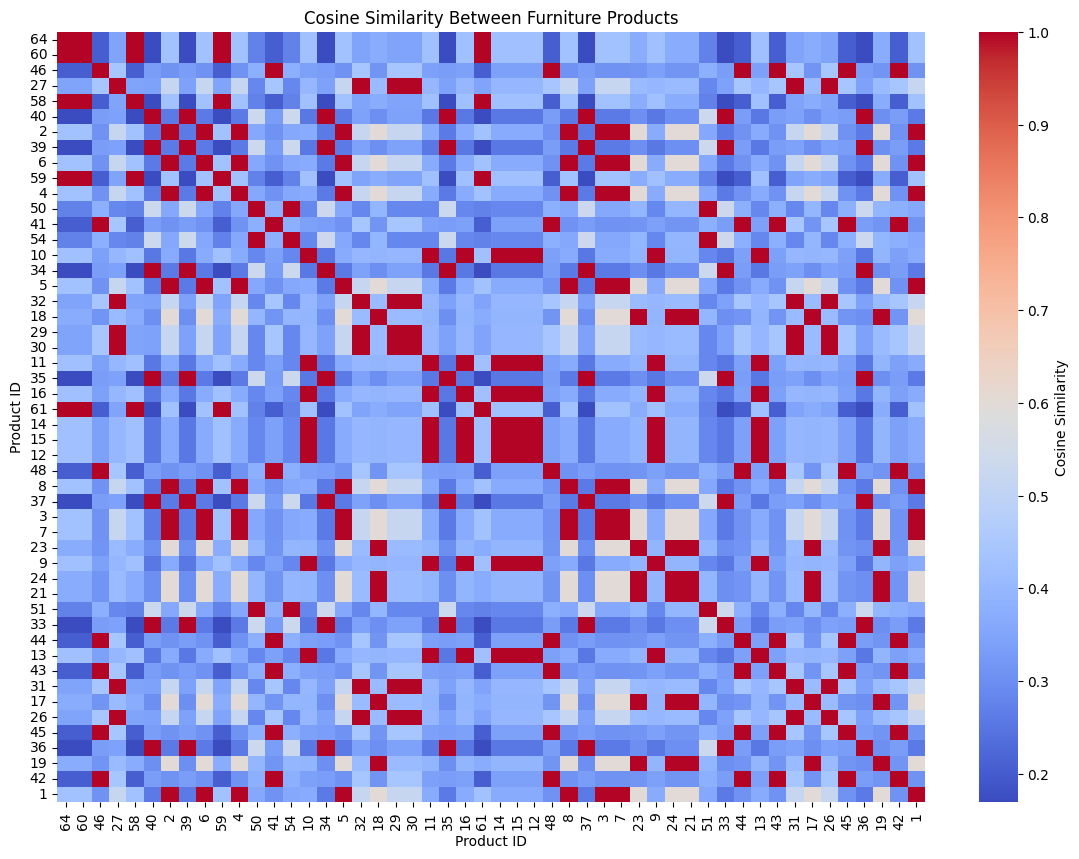

In [ ]:
sim_df = pd.DataFrame(similarity_matrix, index=df['ProductID'], columns=df['ProductID'])
plt.figure(figsize=(14, 10))
sns.heatmap(sim_df, cmap='coolwarm', cbar_kws={'label': 'Cosine Similarity'})
plt.title('Cosine Similarity Between Furniture Products')
plt.xlabel('Product ID')
plt.ylabel('Product ID')
plt.show()

In [4]:
!pip install nbstripout
!nbstripout A furniture_similarity_sbert_50.ipynb

Could not strip 'furniture_similarity_sbert_50.ipynb': file not found
